In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
heart_data = pd.read_csv('../input/heart-failure-prediction/heart.csv')
heart_data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
columns = heart_data.columns
columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
# name of columns having object as dtypes
object_col = []
for i in columns:
    if heart_data[i].dtype == object:
        print(i)
        object_col.append(i)
        
object_col

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
for i in columns:
        print(i)
        counts = heart_data[i].value_counts()
        print(counts)

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
Sex
M    725
F    193
Name: Sex, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
FastingBS
0    704
1    214
Name:

**Let's visualise unique values in data.**

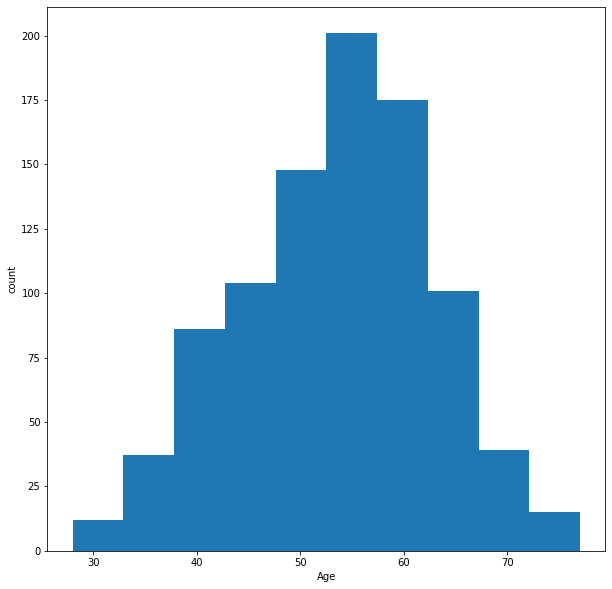

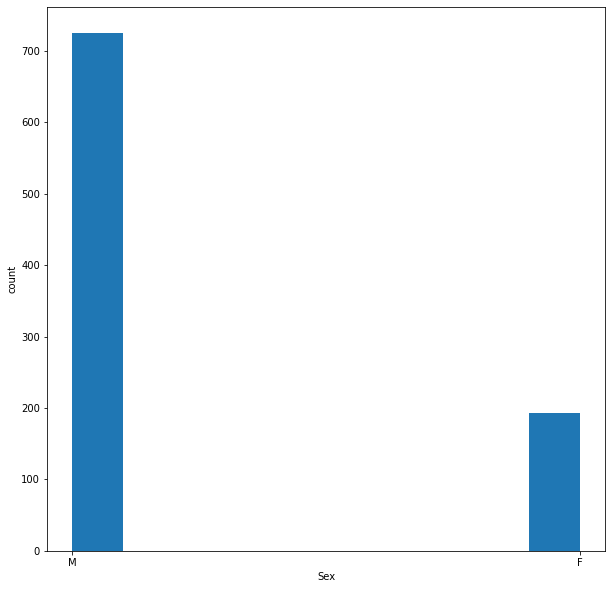

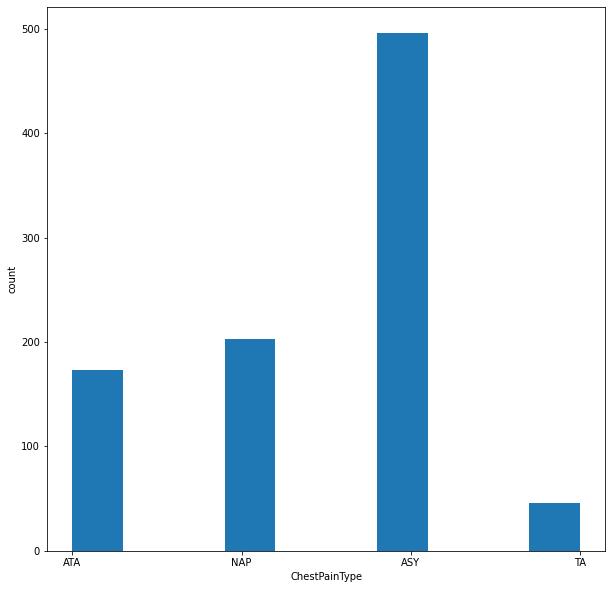

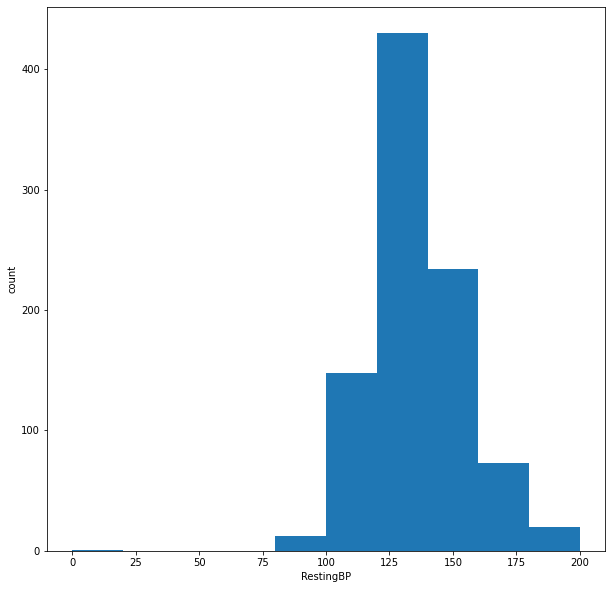

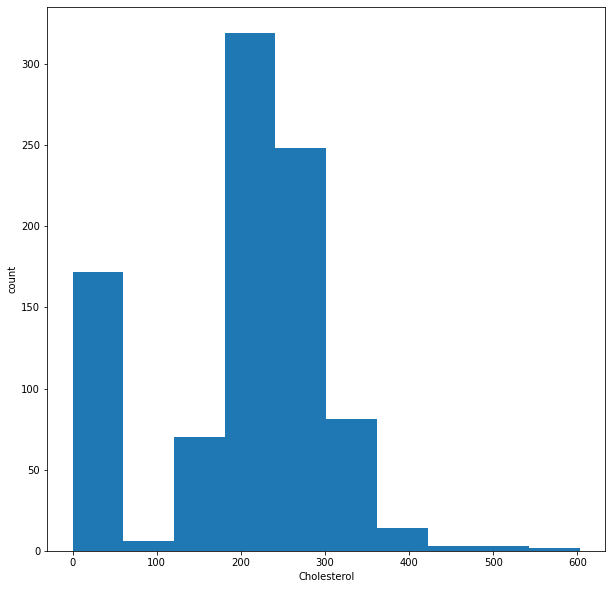

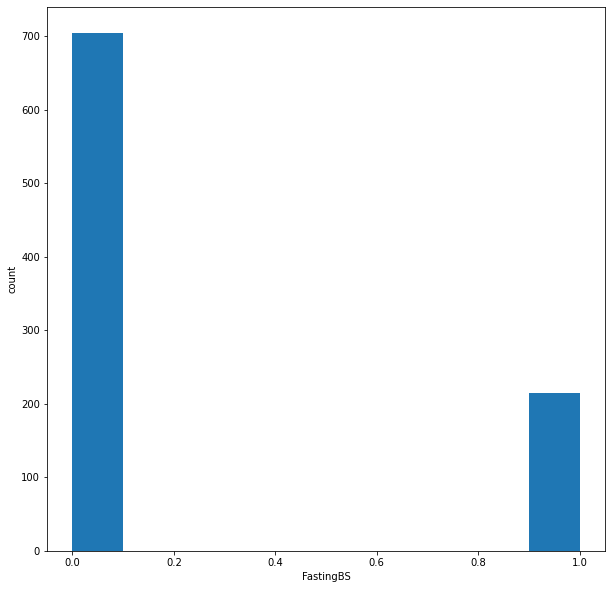

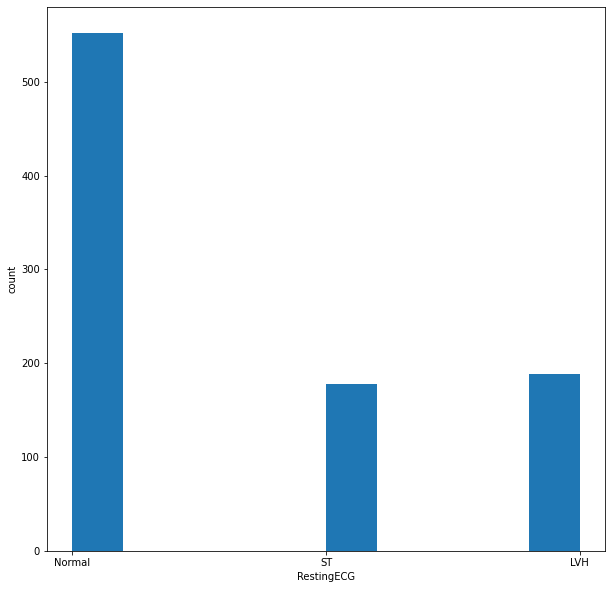

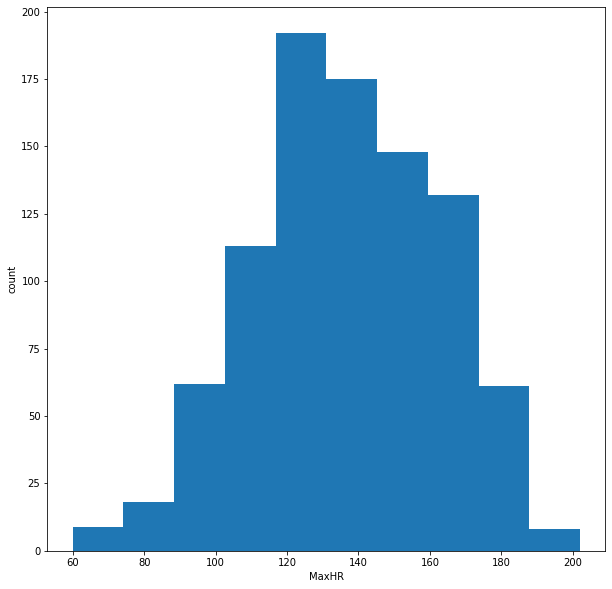

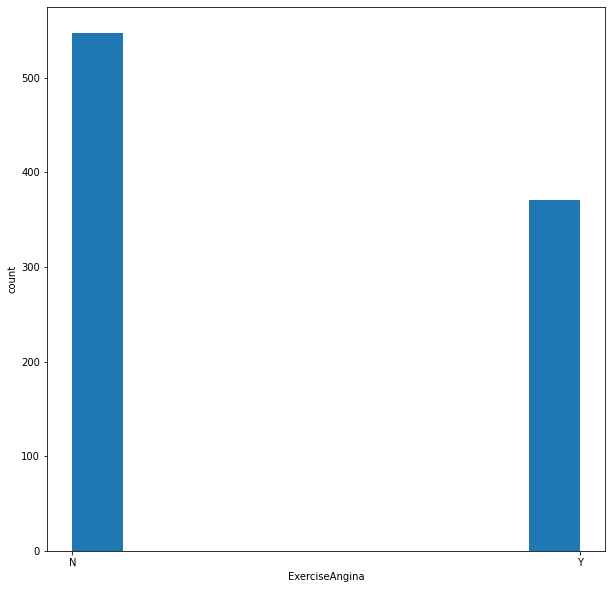

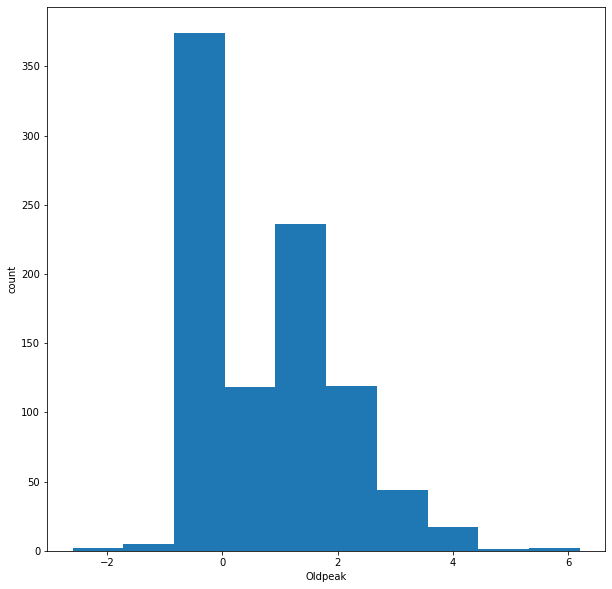

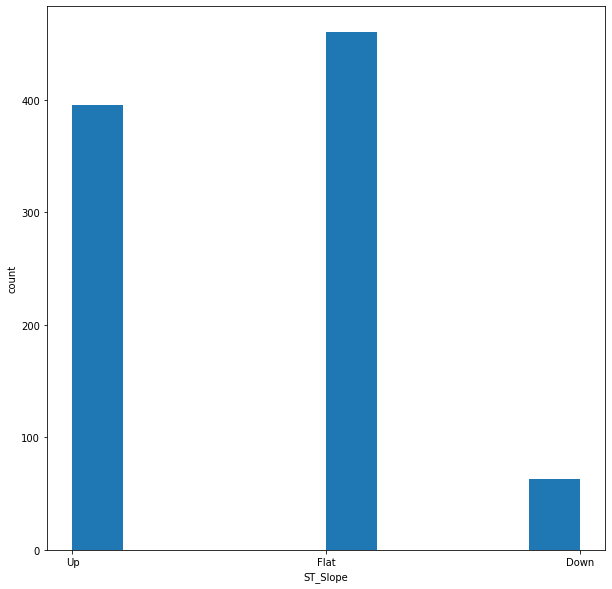

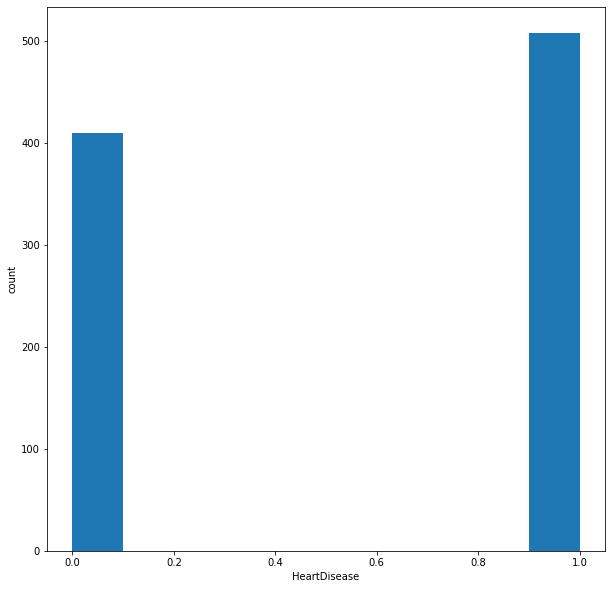

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in columns:
    plt.figure(figsize=(10,10))
    plt.hist(heart_data[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

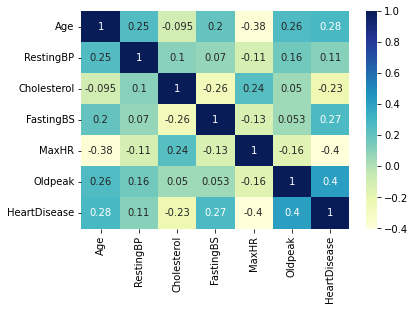

In [8]:
#finding corelation between features
import seaborn as sns

correlation = sns.heatmap(heart_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

There are in total 12 columns and we have only got correlation between 6 columns. 
Let's encode the columns having Dtype as object and than try to find and then try to find the correlatio. 

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_col:
   heart_data[i] = le.fit_transform(heart_data[i])
    
heart_data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


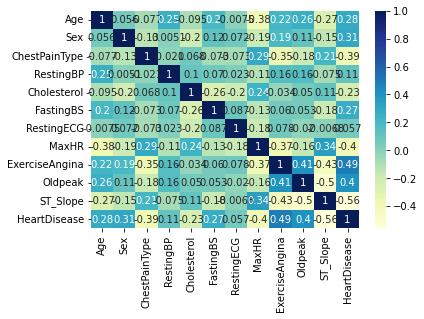

In [10]:
#now let's see the correlation
correlation = sns.heatmap(heart_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### let's split the data and apply machine learning algorith to predict the heart failure

In [11]:
y = heart_data['HeartDisease']
X = heart_data.drop(['HeartDisease'],axis=1)


In [12]:
print(X, y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Accuracy",clf.score(X_train, y_train))
print("Validation accuracy",clf.score(X_test, y_test))



Accuracy 1.0
Validation accuracy 0.7771739130434783


We haven't normalized data yet. let's normalise and see if validation accuracy increases.

In [15]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler()
heart_data =stdscale.fit_transform(X)
heart_data

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
np.random.seed(42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Accuracy",clf.score(X_train, y_train))
print("Validation accuracy",clf.score(X_test, y_test))


Accuracy 1.0
Validation accuracy 0.8260869565217391


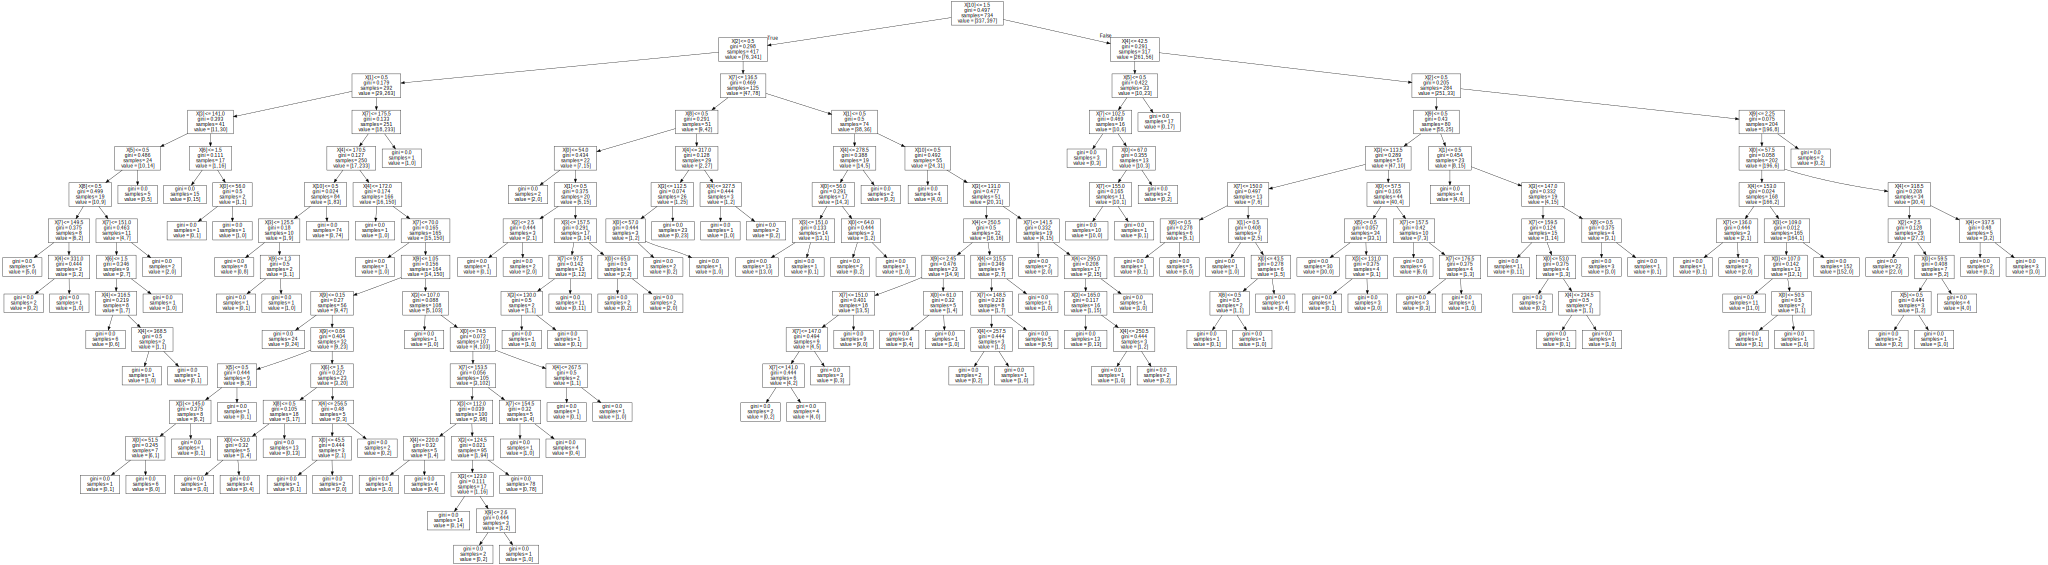

In [18]:
#depth of decision tree
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
print("Model name:Gradient Boosting")
np.random.seed(42)
clf1 = GradientBoostingClassifier()
clf1.fit(X_train, y_train)
print("Accuracy",clf1.score(X_train, y_train))
print("Validation accuracy",clf1.score(X_test, y_test))

Model name:Gradient Boosting
Accuracy 0.946866485013624
Validation accuracy 0.9239130434782609


In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'loss':('log_loss', 'deviance', 'exponential'), 'n_estimators':[100,1000], 'learning_rate':[0.001,1.0]}
np.random.seed(42)
gradientBoosting = GradientBoostingClassifier()
clf2 = GridSearchCV(gradientBoosting, parameters)
clf2.fit(X_train, y_train)
print("Accuracy",clf2.score(X_train, y_train))
print("Validation accuracy",clf2.score(X_test, y_test))


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not 

Accuracy 0.8637602179836512
Validation accuracy 0.8913043478260869


In [21]:
clf2.best_estimator_

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000)